In [ ]:
# SHAP library to explain RandomForestClassifier output

In [97]:
import pandas as pd
import os
import joblib
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [99]:
import shap

In [100]:
import data_manager

In [101]:
def event_prediction(model_name, algo, training_x, testing_x, training_y, testing_y):
    """ Function for predictions """
    algo.fit(training_x,training_y)                           # Fit the training data set to the algorithm passed.
    predictions = algo.predict(testing_x)                     # Get all predictions (y_pred)

In [102]:
tender_type = "LAVORI" # values: SERVIZI, LAVORI, FORNITURE
file_name = "02_bando_cig_"+tender_type+"_label_balanced.csv" 

In [103]:
input_df = data_manager.data_load(file_name, ".", [], False)


Reading csv input: ./02_bando_cig_LAVORI_label_balanced.csv
Columns filter (input): []
...done!



In [104]:
input_df.shape

(10152, 87)

In [105]:
num_cols = ["lots", "procurement_amount", "cod_cpv", "bids_admitted", "bid_award", "bid_drop"] 

In [106]:
bin_cols = ["framework_agreement", "ordinary", "specials", "ABRUZZO","BASILICATA","CALABRIA","CAMPANIA","CENTRALE","EMILIA-ROMAGNA","FRIULI-VENEZIA-GIULIA","LAZIO","LIGURIA","LOMBARDIA","MARCHE","MOLISE","NC","PA-BOLZANO","PA-TRENTO","PIEMONTE","PUGLIA","SARDEGNA","SICILIA","TOSCANA","UMBRIA","VDAOSTA","VENETO", "consortium", "individual", "subcontract",'modality_1', 'modality_2', 'modality_3', 'modality_4', 'modality_5', 'modality_6', 'modality_7', 'modality_8', 'modality_9', 'modality_10', 'modality_11', 'modality_12', 'modality_13', 'modality_14', 'modality_15', 'modality_16', 'modality_17', 'modality_18', 'modality_19', 'eo_selection_1', 'eo_selection_2', 'eo_selection_3', 'eo_selection_4', 'eo_selection_5', 'eo_selection_6', 'eo_selection_7', 'eo_selection_8', 'eo_selection_12', 'eo_selection_14', 'eo_selection_15', 'eo_selection_16', 'eo_selection_22', 'eo_selection_23', 'eo_selection_24', 'eo_selection_25', 'eo_selection_26', 'eo_selection_27', 'eo_selection_28', 'eo_selection_29', 'eo_selection_30', 'eo_selection_32', 'eo_selection_33', 'eo_selection_34', 'eo_selection_35', 'eo_selection_36', 'eo_selection_37', 'eo_selection_38', 'eo_selection_40', 'eo_selection_114', 'eo_selection_122']

In [107]:
# remove missing columns (because missing in original df like some missing modality)
for element in bin_cols:
    if element not in input_df.columns[:-1]:
        bin_cols.remove(element)

In [108]:
drop_list = ['year']
for col in drop_list:
            if col in input_df.columns:
                input_df.drop(col, inplace = True, axis = 1)

In [109]:
col_names = input_df.columns[:-1]

In [110]:
target_col = ["appeal"] # dependent variable (label)

In [111]:
# scale the data
std = StandardScaler()
scaled = std.fit_transform(input_df[num_cols])     # Standardize the numeric columns to get them on the same scale
scaled = pd.DataFrame(scaled, index = input_df.index, columns=num_cols) # index = input_df.index keep the same indexing of input_df

In [112]:
df_train = pd.concat([scaled, input_df[bin_cols + target_col]], axis=1) # concat the scaled df with the remaining columns (binary and outcome)

In [113]:
df_train

,lots,procurement_amount,cod_cpv,bids_admitted,bid_award,bid_drop,framework_agreement,ordinary,specials,ABRUZZO,...,eo_selection_32,eo_selection_33,eo_selection_34,eo_selection_35,eo_selection_36,eo_selection_37,eo_selection_38,eo_selection_40,eo_selection_114,appeal
0,-0.171046,-0.062528,-0.051593,0.095899,-0.069670,0.863897,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-0.171046,-0.035297,-0.051593,1.253421,-0.052492,1.146507,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-0.171046,-0.082238,5.883461,-0.108370,-0.079027,-1.101181,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-0.171046,-0.085626,-0.051593,-0.017584,-0.085831,-0.173961,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-0.171046,0.050975,-0.051593,-0.403424,-0.008109,0.913061,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10147,-0.171046,-0.065819,-2.462708,-0.403424,-0.065512,-1.101181,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10148,-0.171046,-0.087011,-0.051593,-0.403424,-0.086552,-1.101181,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10149,-0.171046,0.414929,-0.051593,-0.403424,0.411792,-1.101181,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10150,-0.171046,-0.066788,-0.051593,-0.403424,-0.066474,-1.101181,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [114]:
X = df_train[col_names]      # Contains the independent columns (matrix input for ML)
y = df_train[target_col]     # Target (outcome) column
test_size_perc = 0.2
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=test_size_perc, random_state=42) # generate the dataframe for train (80% of rows) and test (20% of rows)
train_y = train_y[target_col[0]]
test_y = test_y[target_col[0]]

In [115]:
train_X

,framework_agreement,lots,procurement_amount,cod_cpv,bids_admitted,bid_award,bid_drop,subcontract,ordinary,specials,...,eo_selection_35,eo_selection_36,eo_selection_37,eo_selection_38,eo_selection_4,eo_selection_40,eo_selection_5,eo_selection_6,eo_selection_7,eo_selection_8
1739,0.0,-0.171046,-0.081903,-0.051593,-0.131066,-0.082578,0.250536,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5538,0.0,-0.171046,-0.048621,-0.051593,1.979710,-0.061200,1.123532,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7376,0.0,-0.171046,-0.087284,-0.051593,-0.221852,-0.087380,1.305632,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3519,0.0,-0.171046,-0.070728,-0.051593,-0.199156,-0.070386,0.709360,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5227,0.0,-0.171046,0.160075,-0.051593,-0.199156,0.114108,0.221270,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,-0.171046,-0.063569,-0.051593,-0.131066,-0.070018,0.760097,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5191,0.0,-0.171046,-0.013789,-0.051593,-0.176459,-0.036414,1.018570,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,-0.171046,-0.013456,-0.051593,-0.153763,6.099904,0.155626,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,-0.171046,0.150110,-0.051593,0.073203,0.046182,1.926644,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [116]:
train_y

1739    0
5538    1
7376    1
3519    0
5227    1
       ..
5734    1
5191    1
5390    1
860     0
7270    1
Name: appeal, Length: 8121, dtype: int64

In [117]:
# Prepares a default instance of the random forest 
model = RandomForestClassifier()
# Fits the model on the data
model.fit(train_X, train_y)

RandomForestClassifier()

In [118]:
# Fits the explainer
explainer = shap.Explainer(model.predict, test_X)
# Calculates the SHAP values - It takes some time
shap_values = explainer(test_X)

Permutation explainer: 2032it [03:53,  8.33it/s]                                                                                                                  


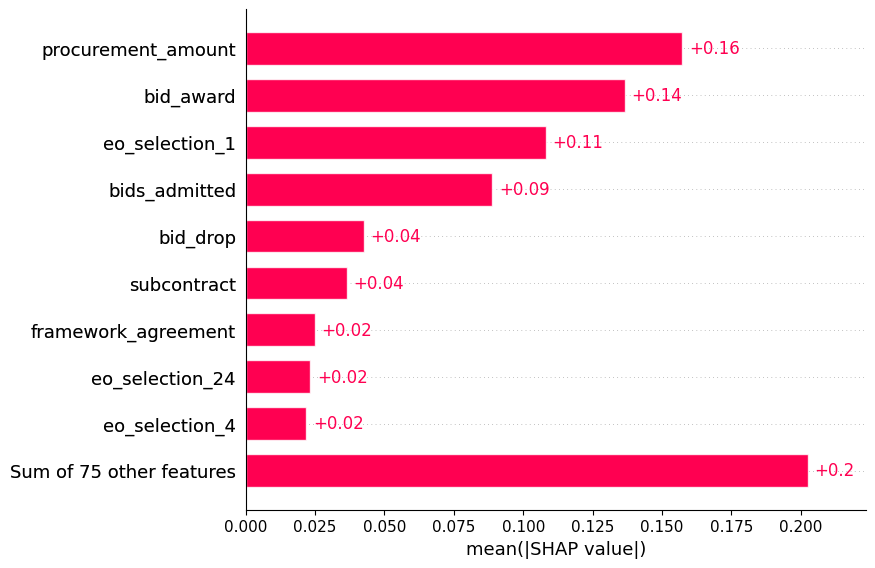

In [119]:
shap.plots.bar(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


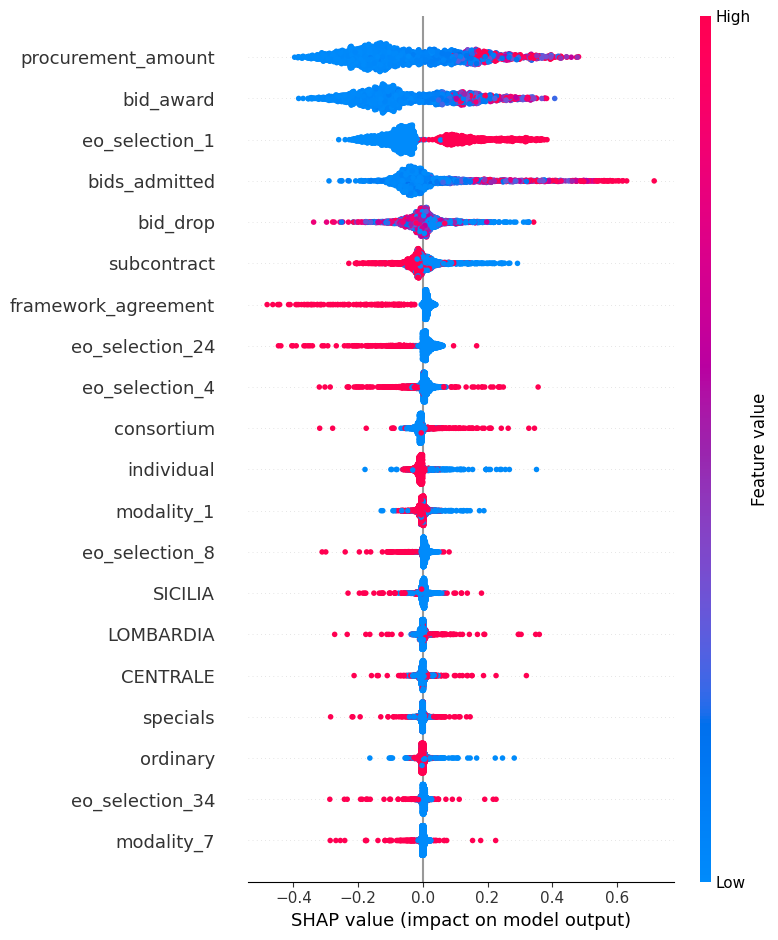

In [120]:
shap.summary_plot(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


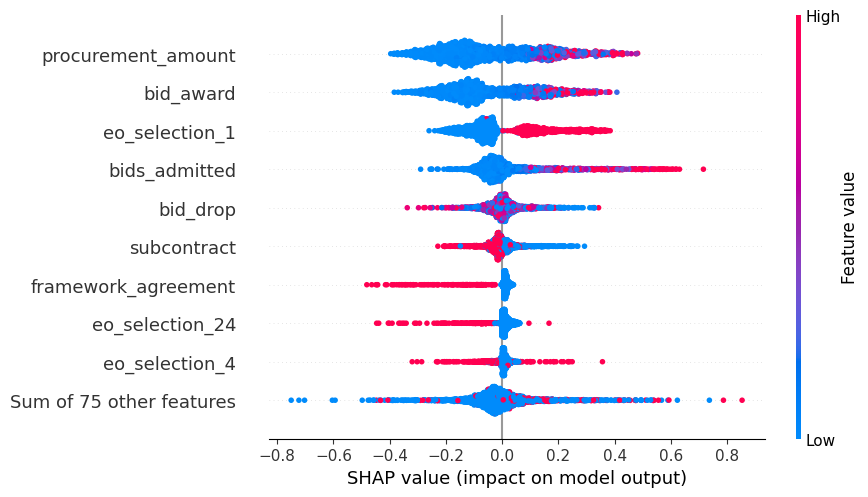

In [121]:
shap.plots.beeswarm(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


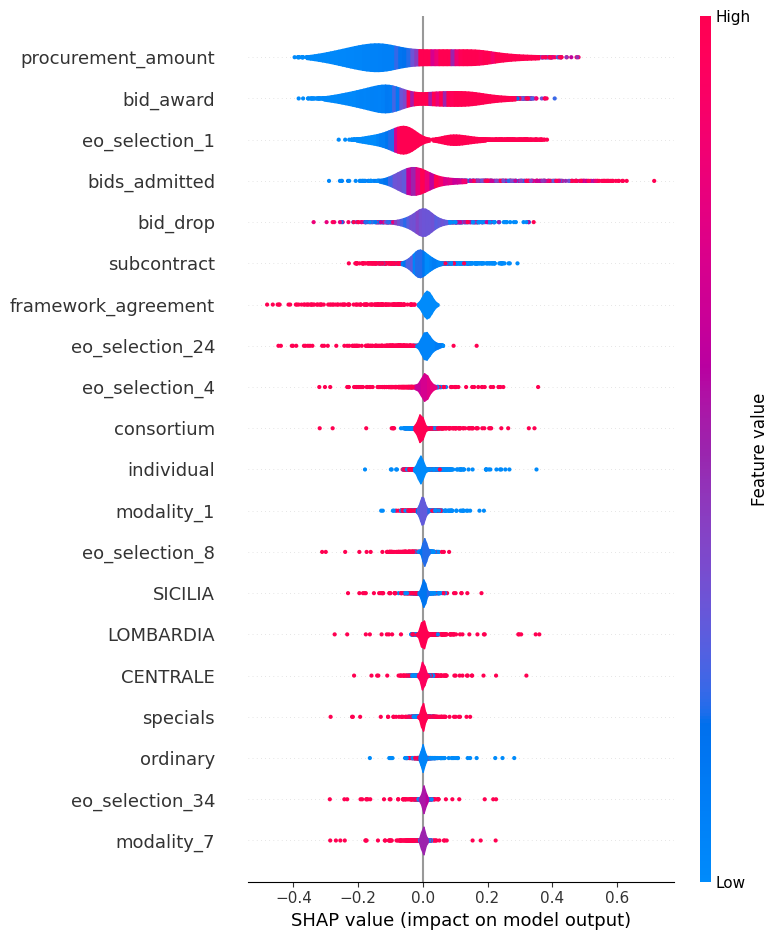

In [122]:
shap.summary_plot(shap_values, plot_type='violin')

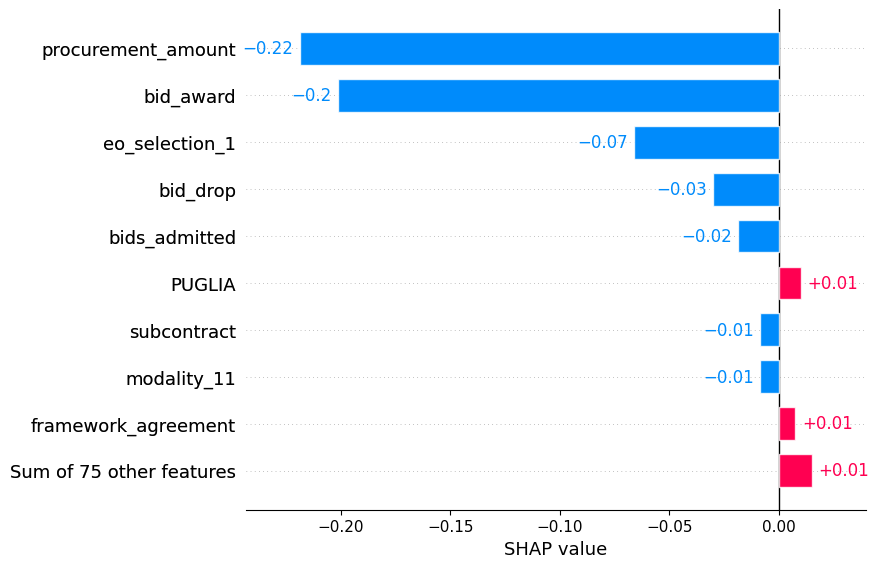

In [123]:
shap.plots.bar(shap_values[0]) # one result only

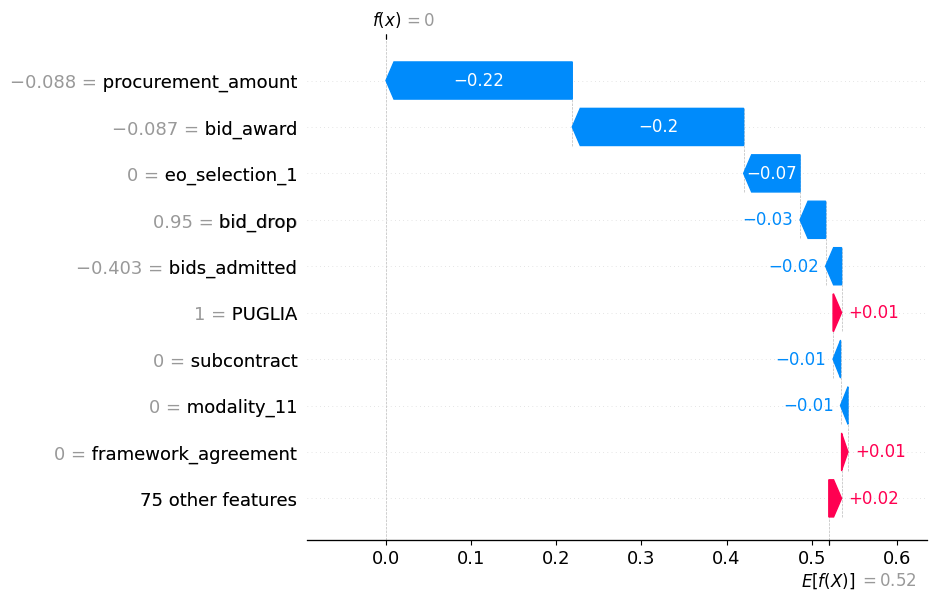

In [124]:
shap.plots.waterfall(shap_values[0]) # one result only

In [125]:
shap.initjs()
shap.plots.force(shap_values[0]) # one result only

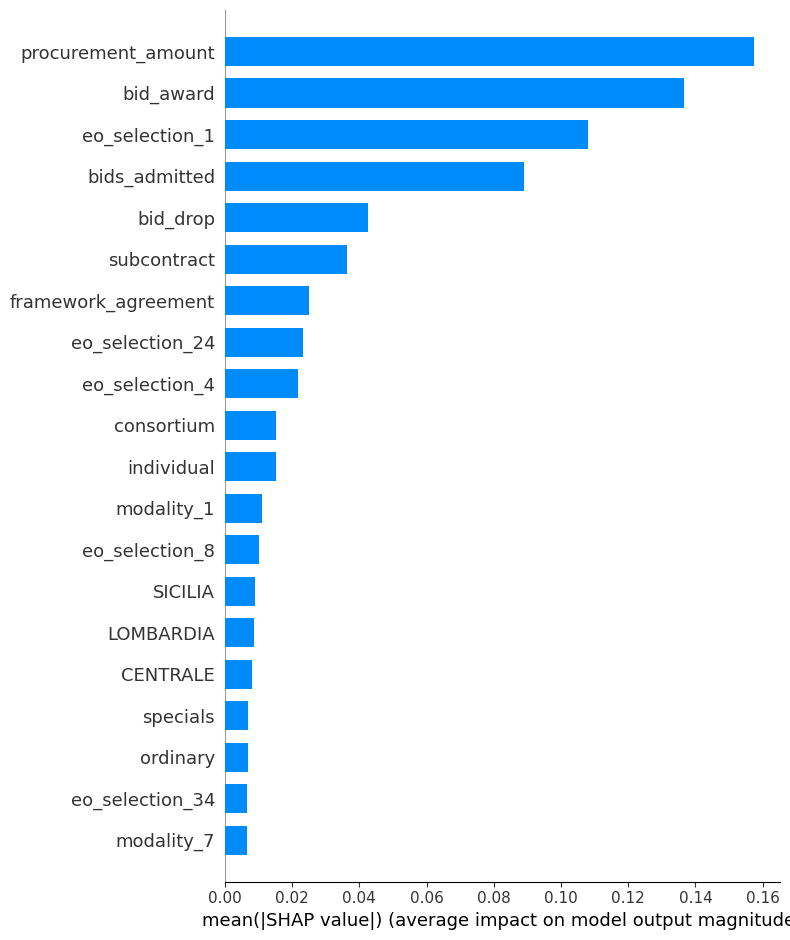

In [126]:
shap.summary_plot(shap_values, train_X, plot_type="bar")